<a href="https://colab.research.google.com/github/oliva2/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#GITHUB dataset link:https://raw.githubusercontent.com/salemprakash/EDA/main/Data/covid-data.csv

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:
!curl -O https://raw.githubusercontent.com/oliva2/EDA/main/example_script.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    51  100    51    0     0     97      0 --:--:-- --:--:-- --:--:--    97


In [18]:
%load example_script.py

In [4]:
import pandas as pd

# Load dataset from URL
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/covid-data.csv'
data = pd.read_csv(url)

# Remove duplicates
data = data.drop_duplicates()


In [6]:
# Replace missing values with column mean, but only for numeric columns
for column in data.select_dtypes(include=['number']).columns:
    data[column].fillna(data[column].mean(), inplace=True)


<ipython-input-6-8a794c8e5f88>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [7]:
# Discretize 'total_cases' into 5 bins
data['total_cases_binned'] = pd.cut(data['total_cases'], bins=5, labels=False)


In [8]:
# Fill missing values as a simplified form of MLE
data['total_cases'].fillna(data['total_cases'].mean(), inplace=True)


<ipython-input-8-b4e3250c2f05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_cases'].fillna(data['total_cases'].mean(), inplace=True)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


Univariate Analysis : We’ll use histograms, box plots, and KDE (Kernel Density Estimate) plots for continuous variables and bar plots for categorical variables.

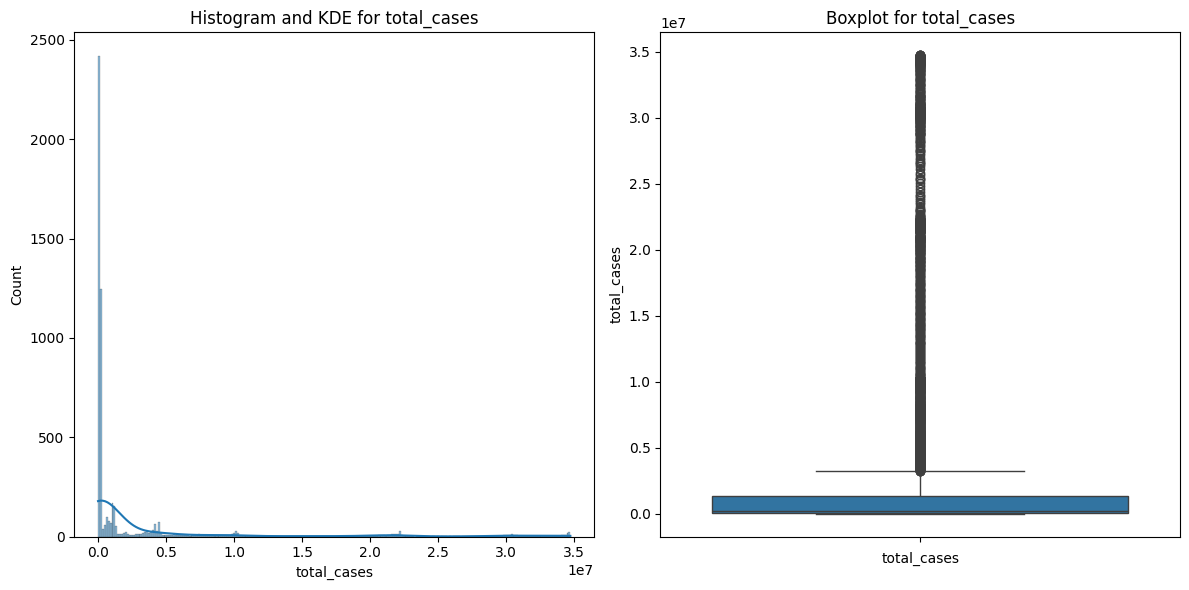

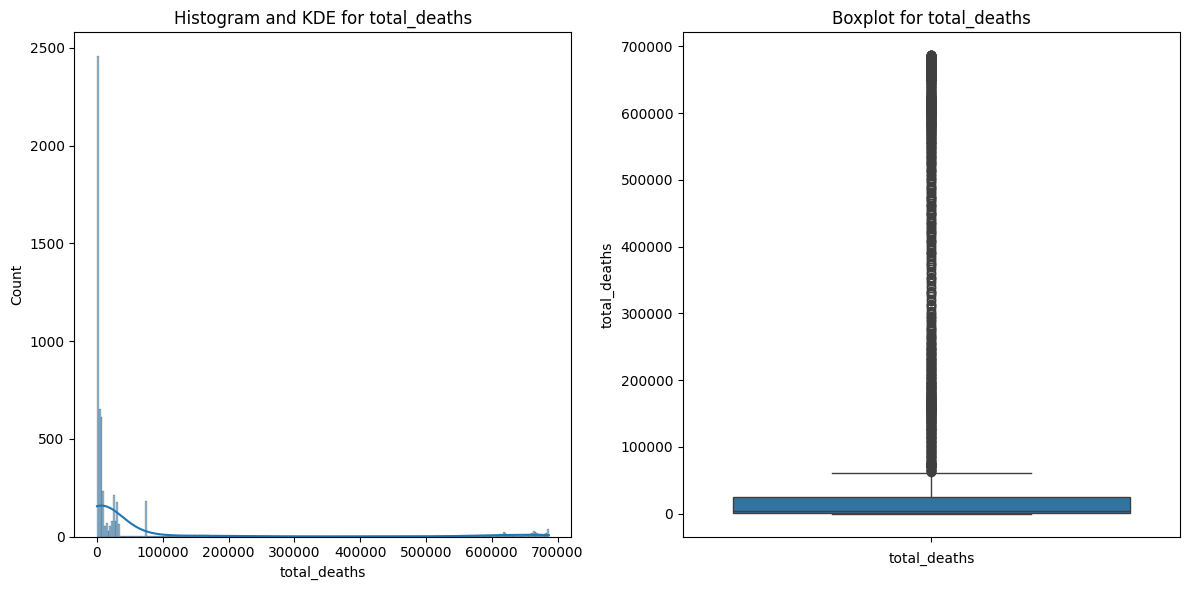

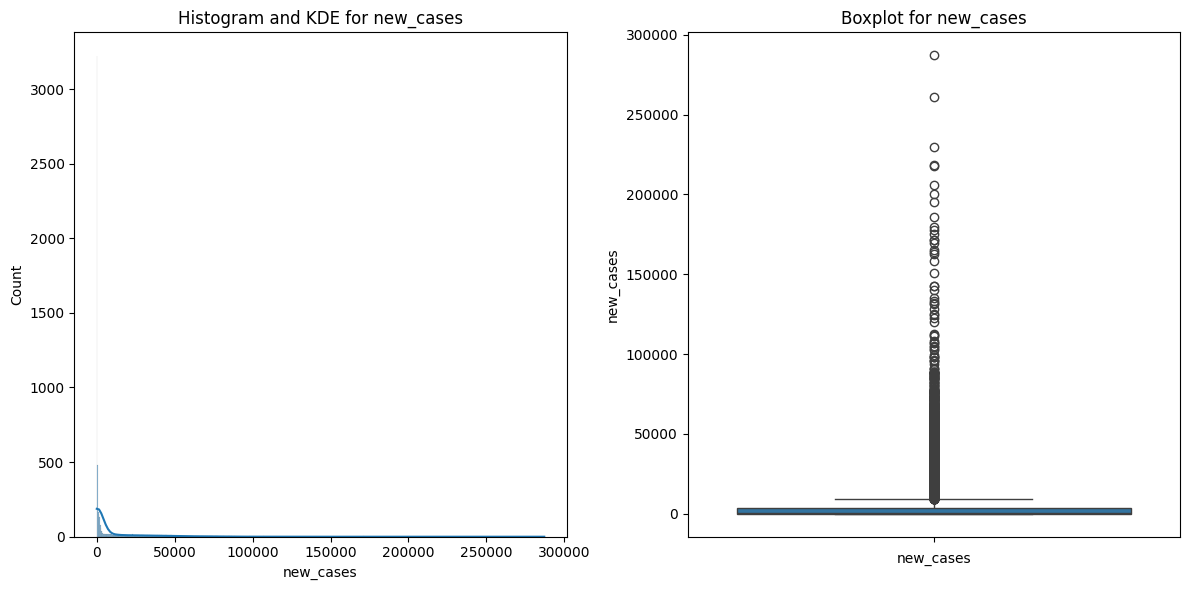

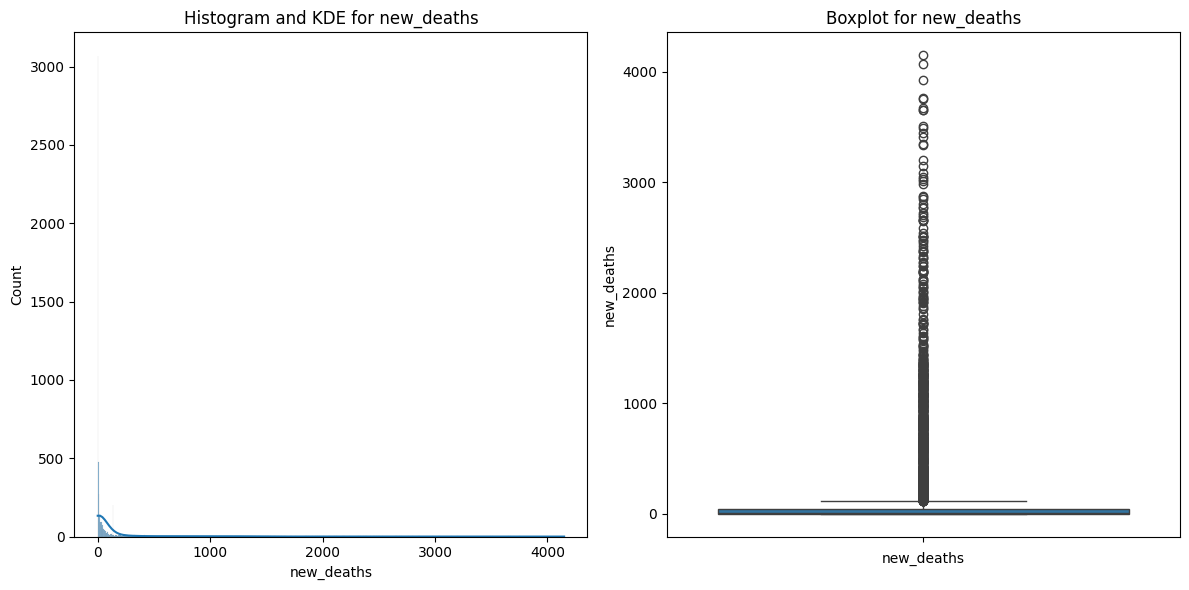

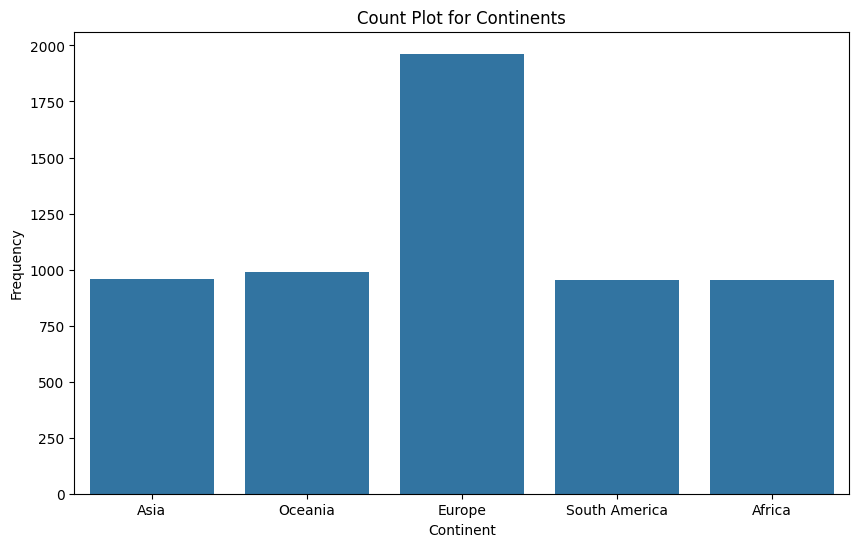

In [12]:
# Histogram and KDE for continuous variables
for col in ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[col].dropna())
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Bar plot for categorical variable - continent
plt.figure(figsize=(10, 6))
sns.countplot(x='continent', data=data)
plt.title('Count Plot for Continents')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.show()


 bivariate analysis, we will use scatter plots, heatmaps, and violin plots to understand the relationships between pairs of variables.


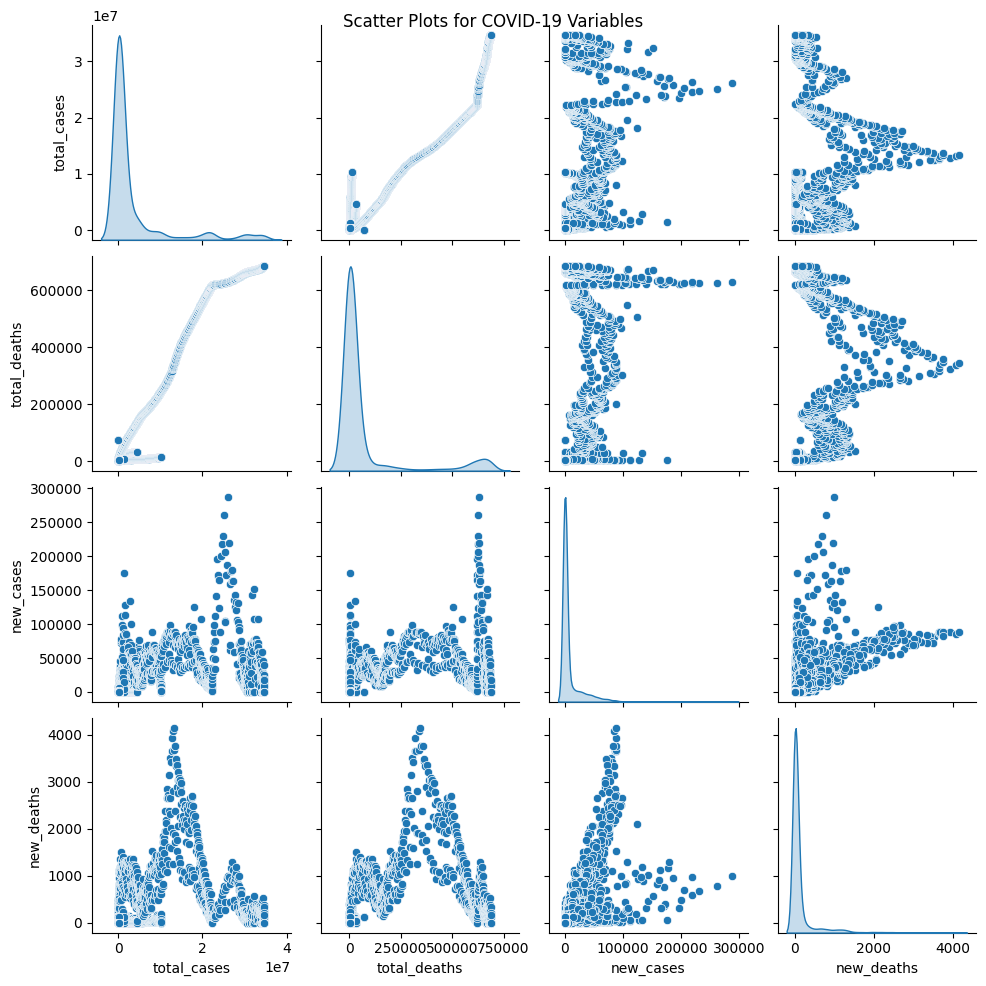

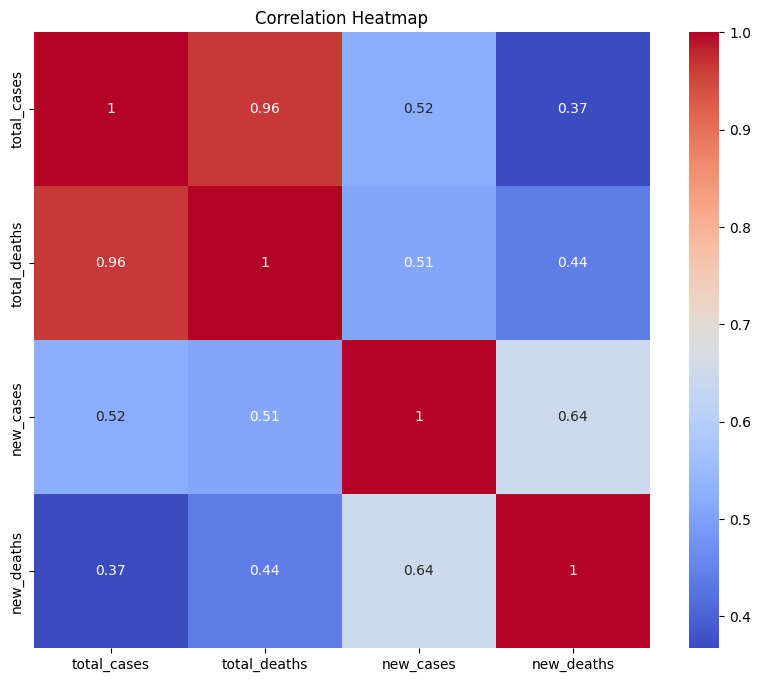

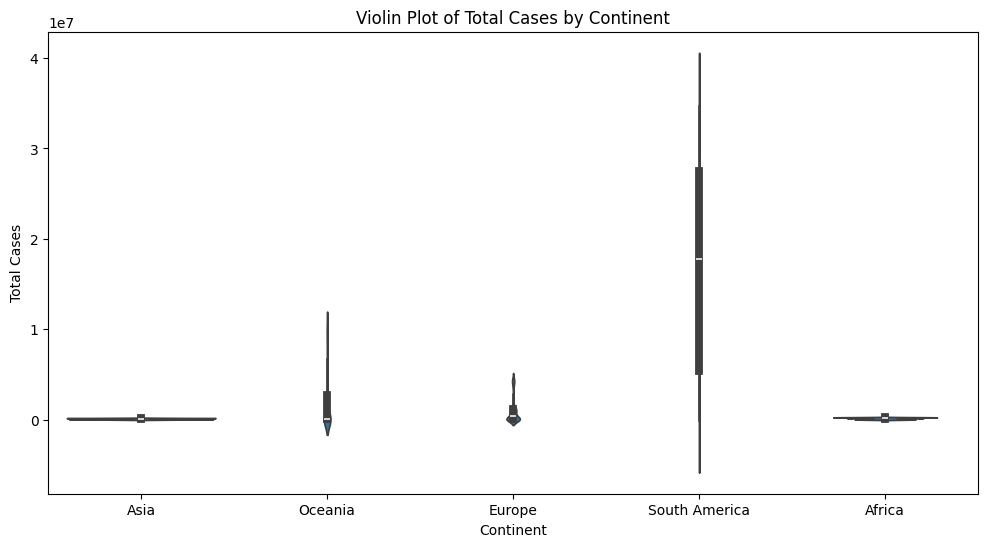

In [13]:
# Scatter plots for pairs of variables
sns.pairplot(data[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']], diag_kind='kde')
plt.suptitle('Scatter Plots for COVID-19 Variables')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Violin plot for continent and total cases
plt.figure(figsize=(12, 6))
sns.violinplot(x='continent', y='total_cases', data=data)
plt.title('Violin Plot of Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()


multivariate interactions using pair plots with hue and a 3D scatter plot to explore the relationships between more than two variables.

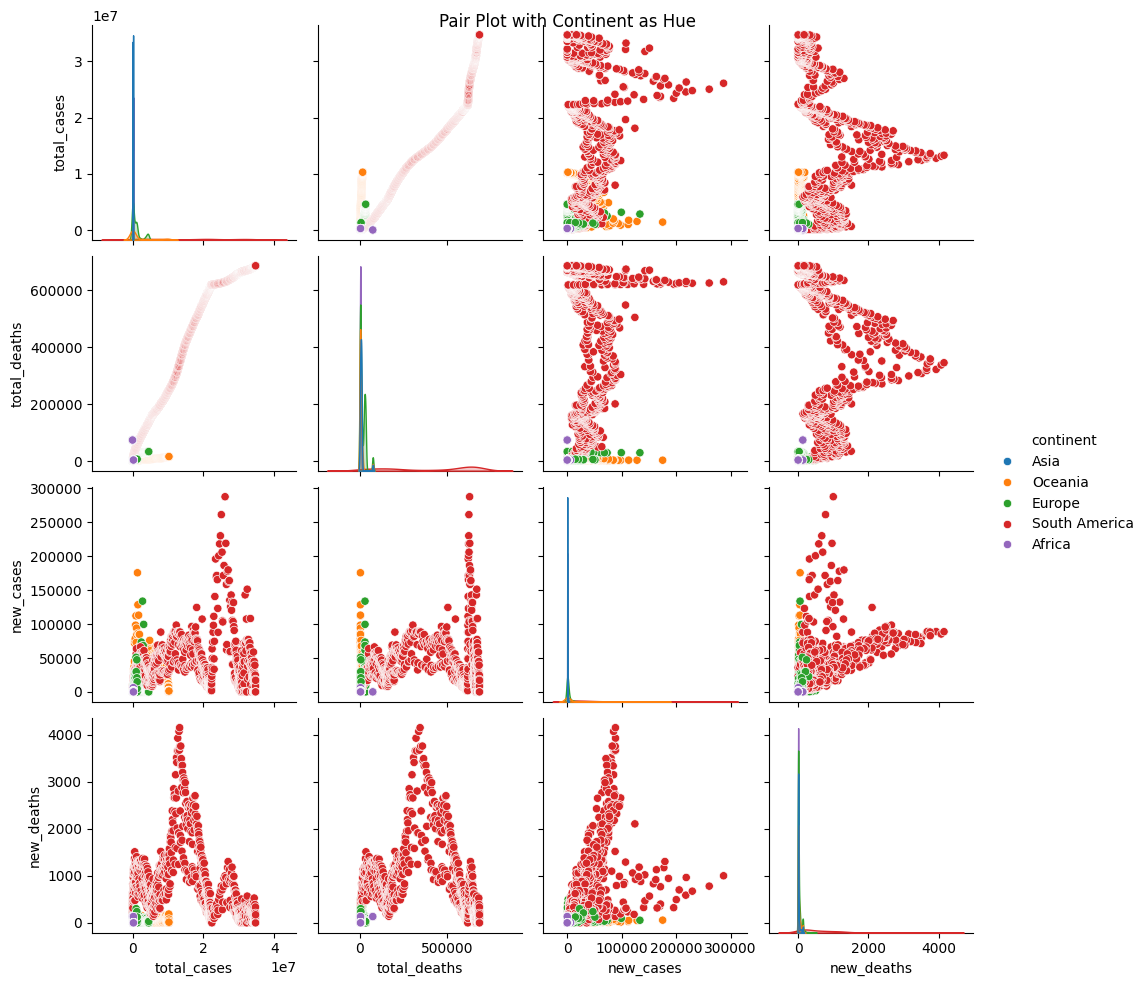

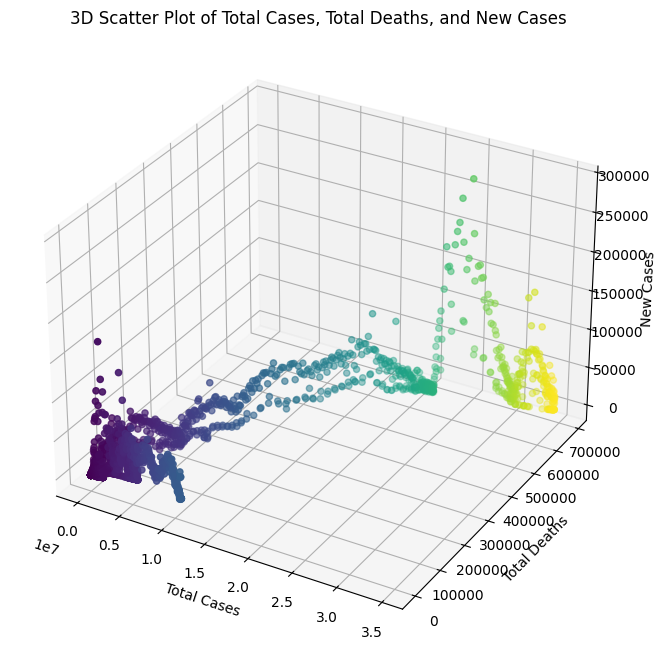

In [14]:
# Pairplot with hue for multivariate insights
sns.pairplot(data, vars=['total_cases', 'total_deaths', 'new_cases', 'new_deaths'], hue='continent')
plt.suptitle('Pair Plot with Continent as Hue')
plt.show()

# 3D Scatter plot for multivariate analysis
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['total_cases'], data['total_deaths'], data['new_cases'], c=data['total_cases'], cmap='viridis')
ax.set_xlabel('Total Cases')
ax.set_ylabel('Total Deaths')
ax.set_zlabel('New Cases')
plt.title('3D Scatter Plot of Total Cases, Total Deaths, and New Cases')
plt.show()


Time series Analysis

<ipython-input-15-bc0cc1f03f74>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


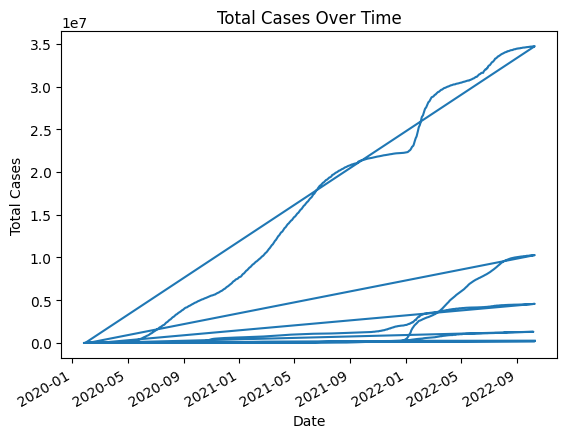

In [15]:
# Convert date column to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Visualize time series data
data['total_cases'].plot(title='Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()


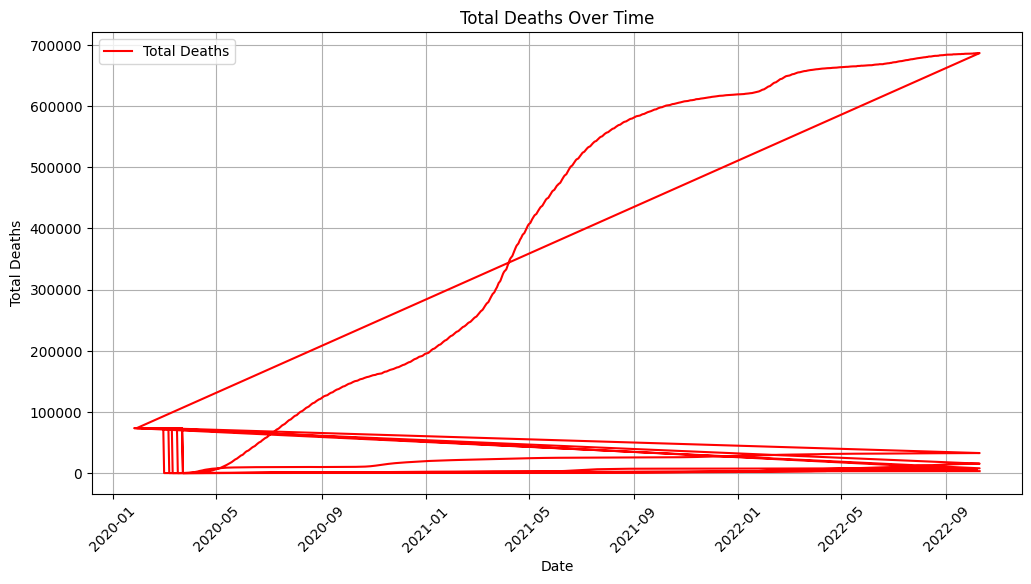

In [17]:
# Plot total deaths over time
plt.figure(figsize=(12, 6))
# Access the index instead of the removed 'date' column
plt.plot(data.index, data['total_deaths'], label='Total Deaths', color='red')
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

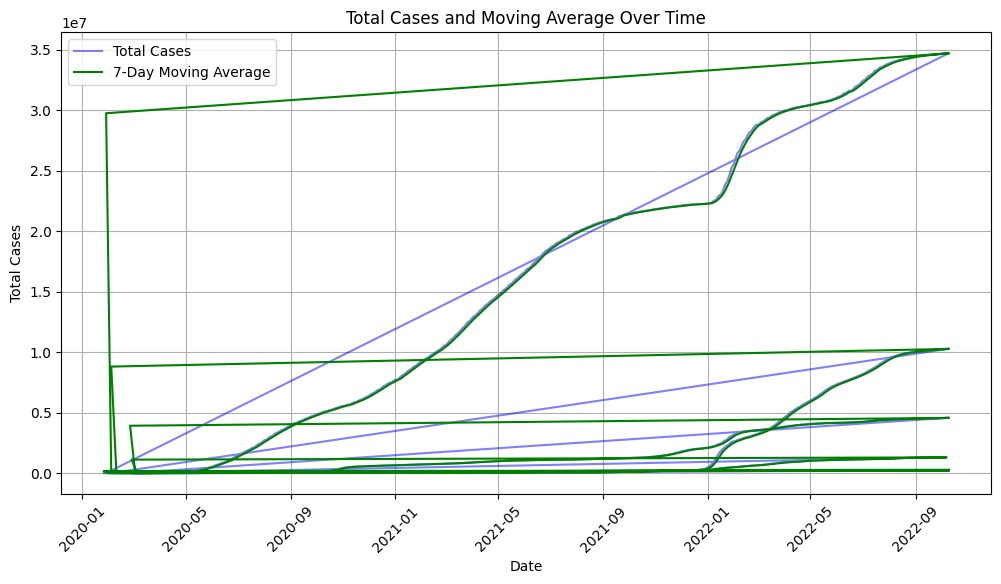

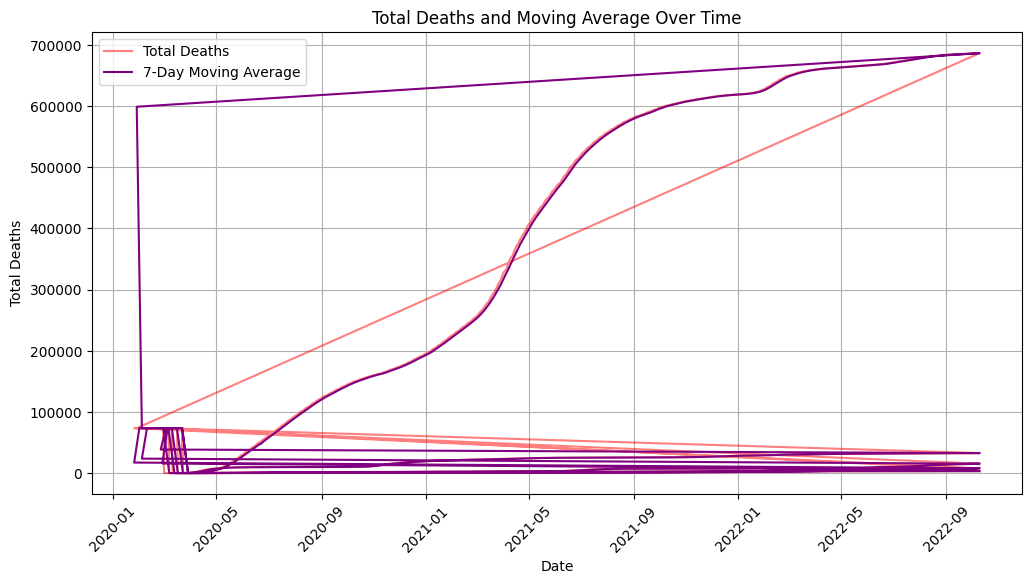

In [19]:
# Moving Average for Total Cases
data['total_cases_ma'] = data['total_cases'].rolling(window=7).mean()

# Moving Average for Total Deaths
data['total_deaths_ma'] = data['total_deaths'].rolling(window=7).mean()

# Plotting Moving Average
plt.figure(figsize=(12, 6))
# Use data.index for the x-axis since 'date' is the index
plt.plot(data.index, data['total_cases'], label='Total Cases', alpha=0.5, color='blue')
plt.plot(data.index, data['total_cases_ma'], label='7-Day Moving Average', color='green')
plt.title('Total Cases and Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting Moving Average for Total Deaths
plt.figure(figsize=(12, 6))
# Use data.index for the x-axis since 'date' is the index
plt.plot(data.index, data['total_deaths'], label='Total Deaths', alpha=0.5, color='red')
plt.plot(data.index, data['total_deaths_ma'], label='7-Day Moving Average', color='purple')
plt.title('Total Deaths and Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


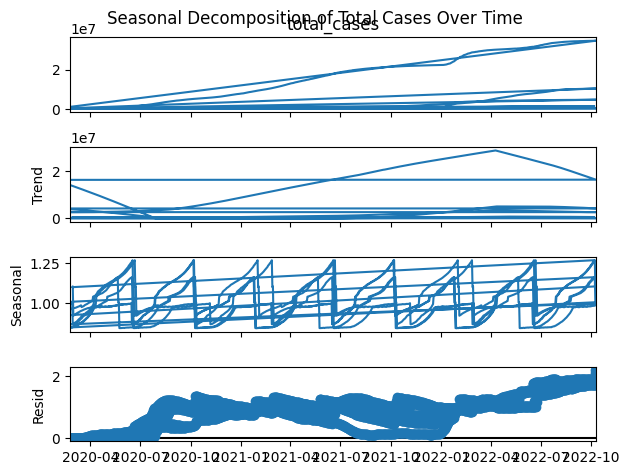

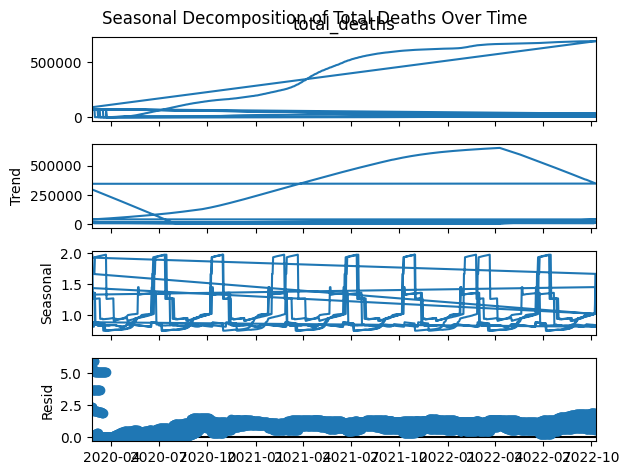

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt



# Decompose the time series for total cases
decomposition = sm.tsa.seasonal_decompose(data['total_cases'], model='multiplicative', period=365)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Total Cases Over Time')
plt.show()

# Decompose the time series for total deaths
decomposition_deaths = sm.tsa.seasonal_decompose(data['total_deaths'], model='multiplicative', period=365)
decomposition_deaths.plot()
plt.suptitle('Seasonal Decomposition of Total Deaths Over Time')
plt.show()

<Figure size 1200x600 with 0 Axes>

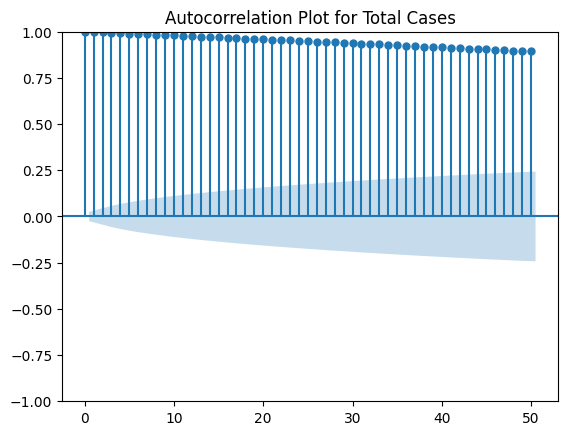

<Figure size 1200x600 with 0 Axes>

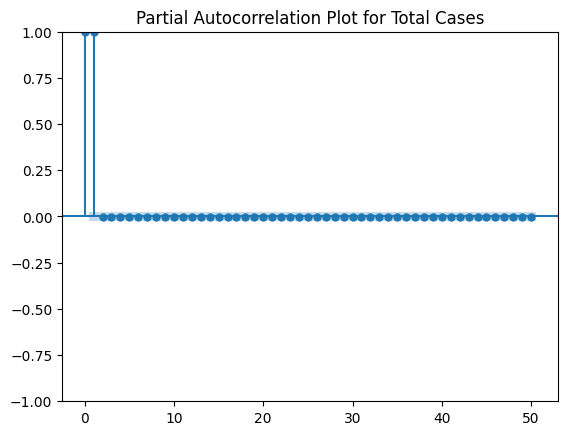

<Figure size 1200x600 with 0 Axes>

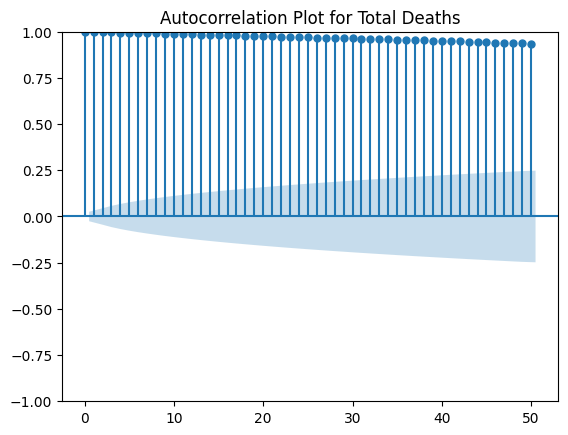

<Figure size 1200x600 with 0 Axes>

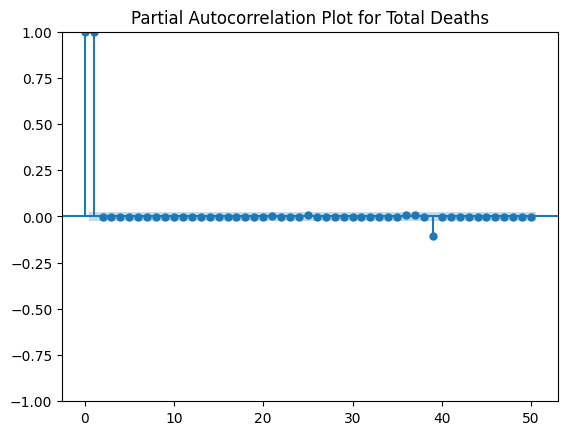

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot for total cases
plt.figure(figsize=(12, 6))
plot_acf(data['total_cases'].dropna(), lags=50)
plt.title('Autocorrelation Plot for Total Cases')
plt.show()

# Partial Autocorrelation plot for total cases
plt.figure(figsize=(12, 6))
plot_pacf(data['total_cases'].dropna(), lags=50)
plt.title('Partial Autocorrelation Plot for Total Cases')
plt.show()

# Autocorrelation plot for total deaths
plt.figure(figsize=(12, 6))
plot_acf(data['total_deaths'].dropna(), lags=50)
plt.title('Autocorrelation Plot for Total Deaths')
plt.show()

# Partial Autocorrelation plot for total deaths
plt.figure(figsize=(12, 6))
plot_pacf(data['total_deaths'].dropna(), lags=50)
plt.title('Partial Autocorrelation Plot for Total Deaths')
plt.show()


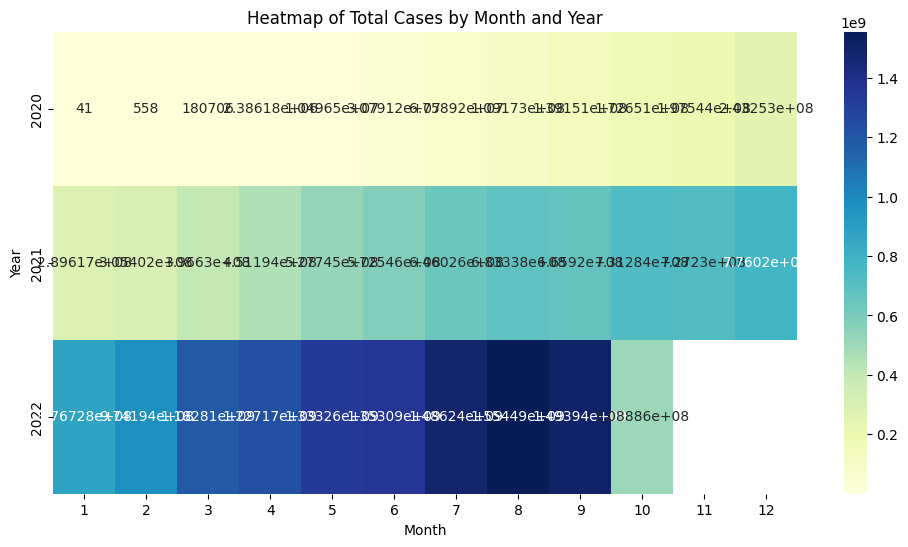

In [23]:
# Create a new column for month and year
data['month'] = data.index.month
data['year'] = data.index.year

# Pivot the data for monthly visualization
monthly_data = data.pivot_table(values='total_cases', index='year', columns='month', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Total Cases by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


Resampling techniques

<ipython-input-24-eb2e83195e2b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').sum()


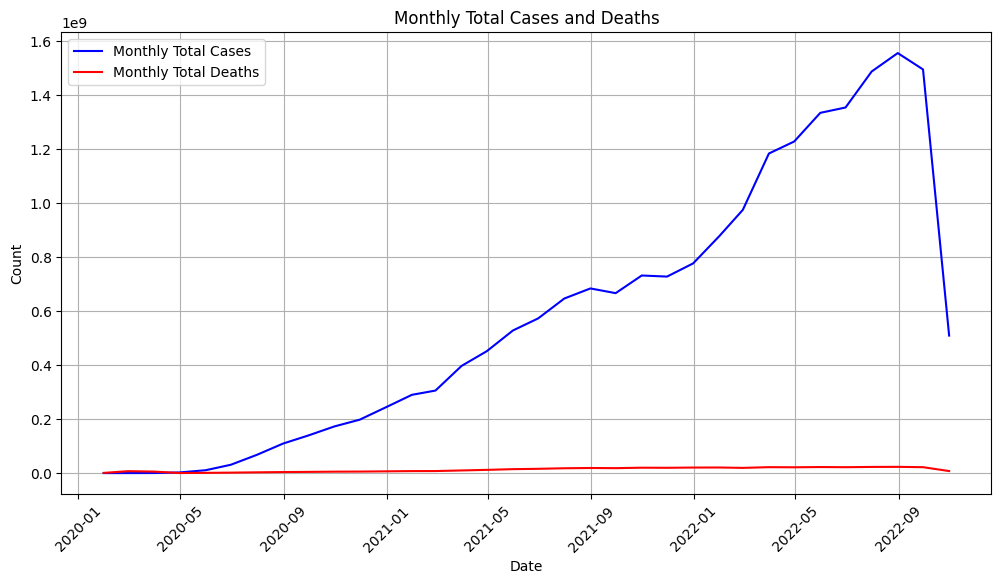

In [24]:
# Resample data by month and aggregate with sum (total cases and deaths)
monthly_data = data.resample('M').sum()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['total_cases'], label='Monthly Total Cases', color='blue')
plt.plot(monthly_data.index, monthly_data['total_deaths'], label='Monthly Total Deaths', color='red')
plt.title('Monthly Total Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Resampling with Mean or Other Aggregations

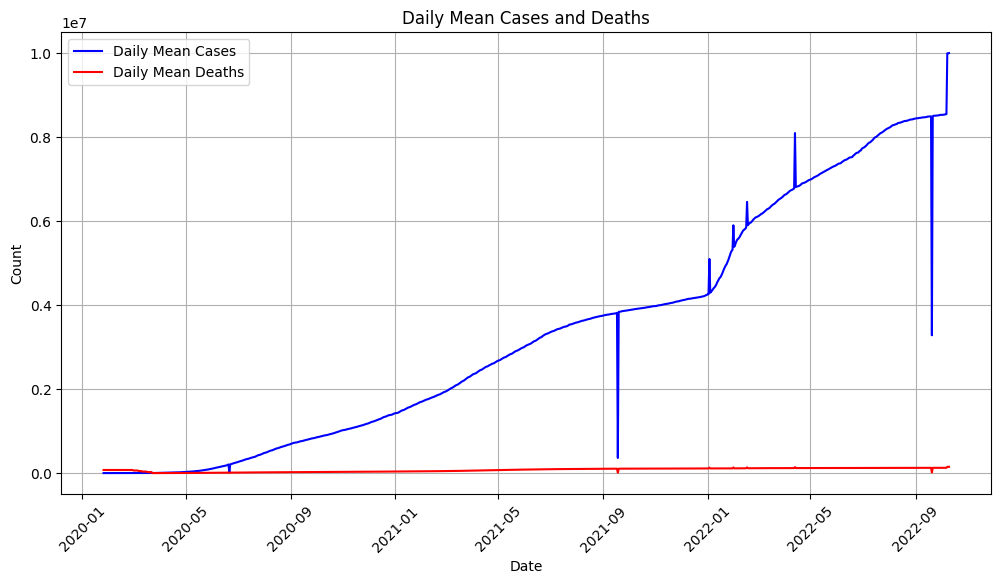

In [26]:
# Resample to daily frequency and take the mean of only numeric columns
daily_mean_data = data.resample('D').mean(numeric_only=True)

# Plot daily mean values
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_data.index, daily_mean_data['total_cases'], label='Daily Mean Cases', color='blue')
plt.plot(daily_mean_data.index, daily_mean_data['total_deaths'], label='Daily Mean Deaths', color='red')
plt.title('Daily Mean Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


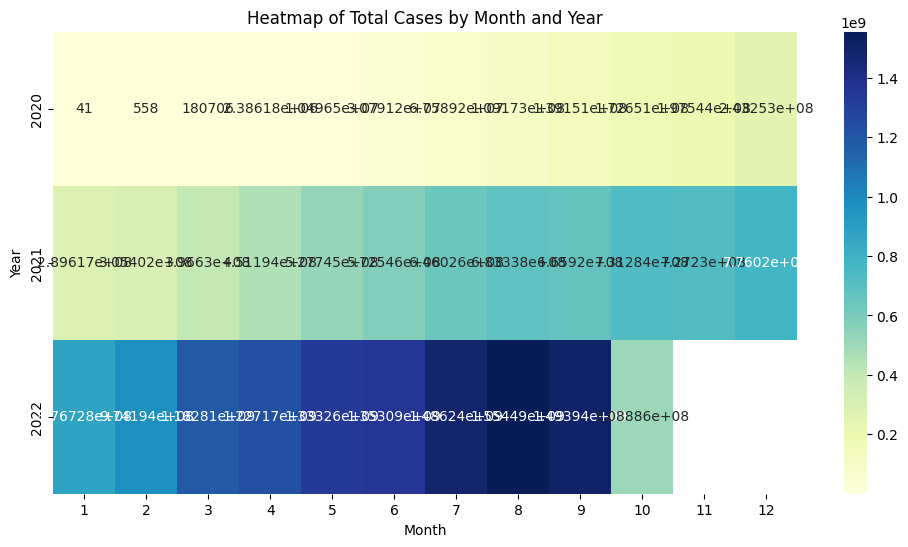

In [29]:
# Create a new column for month and year
data['month'] = data.index.month
data['year'] = data.index.year

# Pivot the data for heatmap visualization (monthly total cases)
monthly_data_pivot = data.pivot_table(values='total_cases', index='year', columns='month', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_data_pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Total Cases by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()



<ipython-input-28-d49ce15d0d6e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').sum()


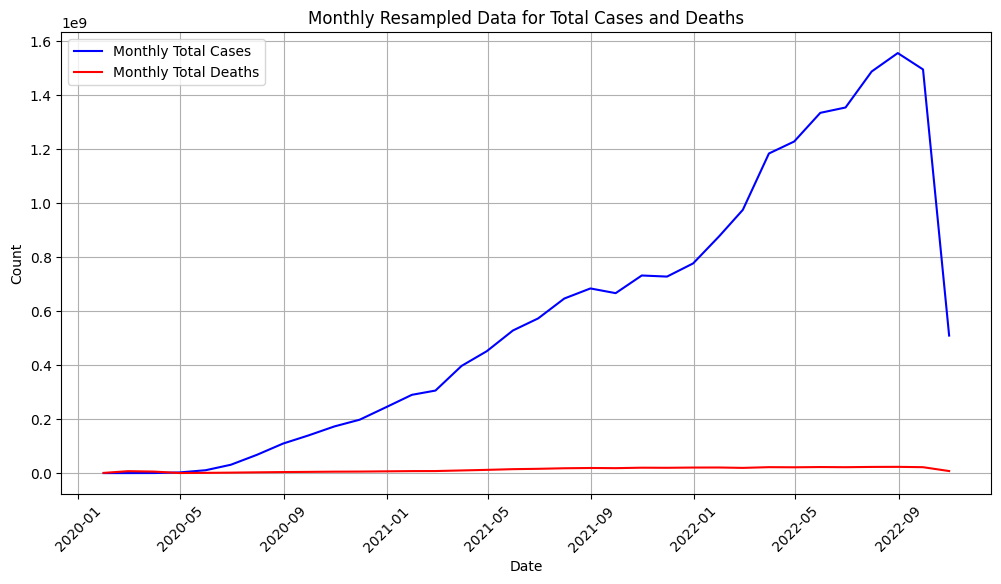

In [28]:
# Resample to monthly frequency
monthly_data = data.resample('M').sum()

# Plot the monthly resampled data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['total_cases'], label='Monthly Total Cases', color='blue')
plt.plot(monthly_data.index, monthly_data['total_deaths'], label='Monthly Total Deaths', color='red')
plt.title('Monthly Resampled Data for Total Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Data summarization and visualization

In [30]:
# Summary statistics
print(data.describe())


        total_cases      new_cases  new_cases_smoothed   total_deaths  \
count  5.818000e+03    5818.000000         5818.000000    5818.000000   
mean   3.392399e+06    8814.365761         8828.573523   73497.078219   
std    7.640506e+06   21246.164422        19591.444649  177879.639390   
min    1.000000e+00       0.000000            0.000000       1.000000   
25%    4.097500e+04      24.000000           71.321750    1084.250000   
50%    1.763050e+05     261.000000          520.571500    3351.000000   
75%    1.317076e+06    3666.000000         6036.857000   25352.500000   
max    3.472419e+07  287149.000000       189227.000000  686877.000000   

        new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  5818.000000          5818.000000              5818.000000   
mean    133.369113           133.869586             58633.064842   
std     398.537146           377.512802             98559.689455   
min       0.000000             0.000000                 0.005000   
25

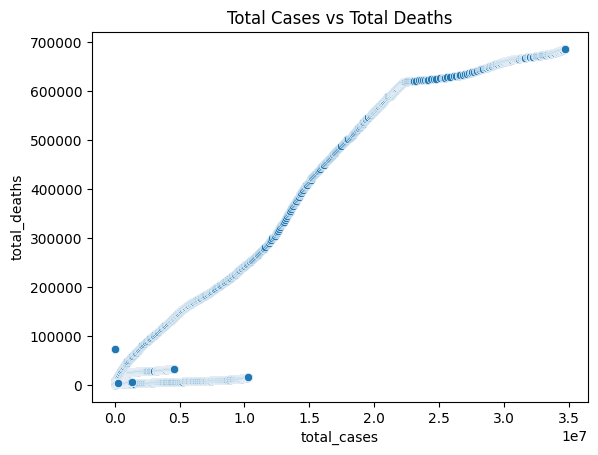

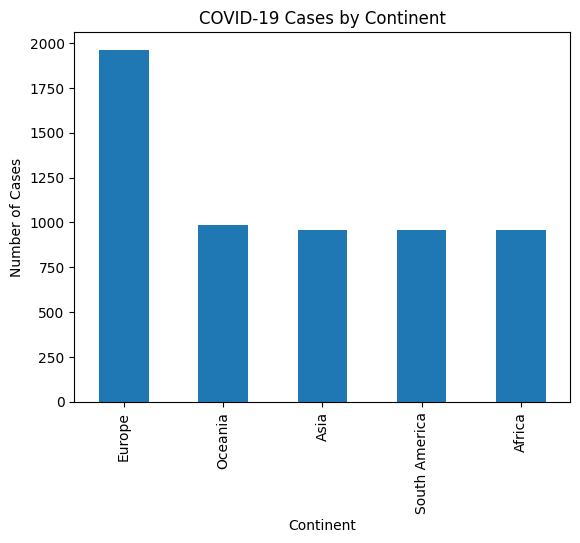

In [31]:
# Scatter plot
sns.scatterplot(x='total_cases', y='total_deaths', data=data)
plt.title('Total Cases vs Total Deaths')
plt.show()

# Bar plot
data['continent'].value_counts().plot(kind='bar', title='COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.show()


In [32]:
from scipy.stats import kurtosis, skew

# Calculate skewness and kurtosis for numerical columns
print(f"Skewness of Total Cases: {skew(data['total_cases'])}")
print(f"Kurtosis of Total Cases: {kurtosis(data['total_cases'])}")


Skewness of Total Cases: 2.742075218520086
Kurtosis of Total Cases: 6.669473882984196


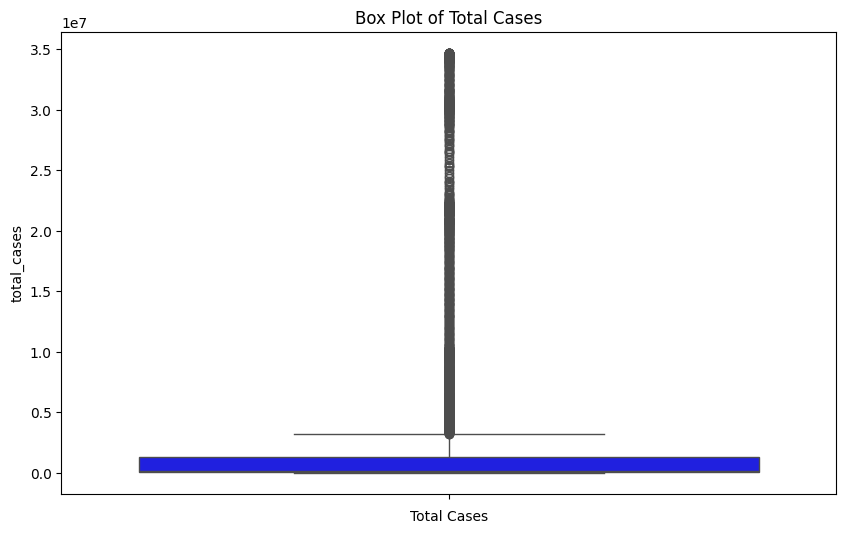

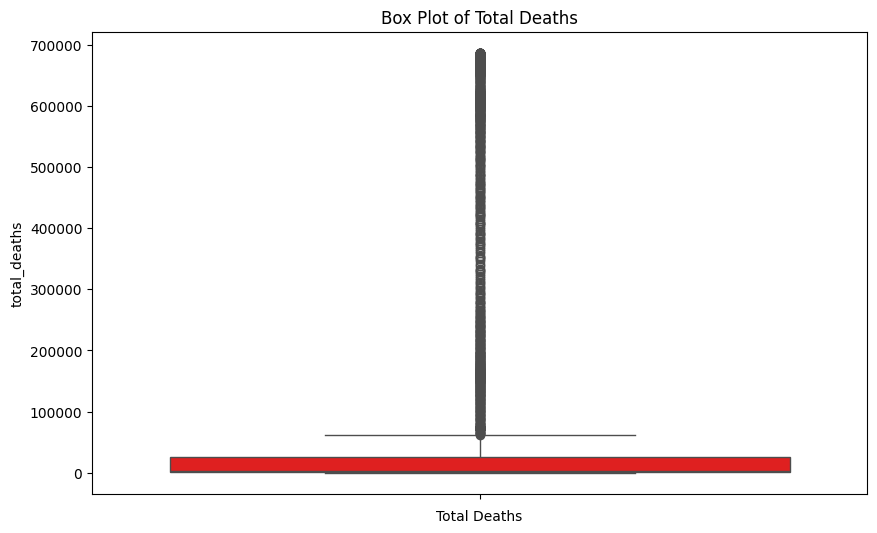

In [33]:
# Box plot for total cases
plt.figure(figsize=(10, 6))
sns.boxplot(data['total_cases'], color='blue')
plt.title('Box Plot of Total Cases')
plt.xlabel('Total Cases')
plt.show()

# Box plot for total deaths
plt.figure(figsize=(10, 6))
sns.boxplot(data['total_deaths'], color='red')
plt.title('Box Plot of Total Deaths')
plt.xlabel('Total Deaths')
plt.show()


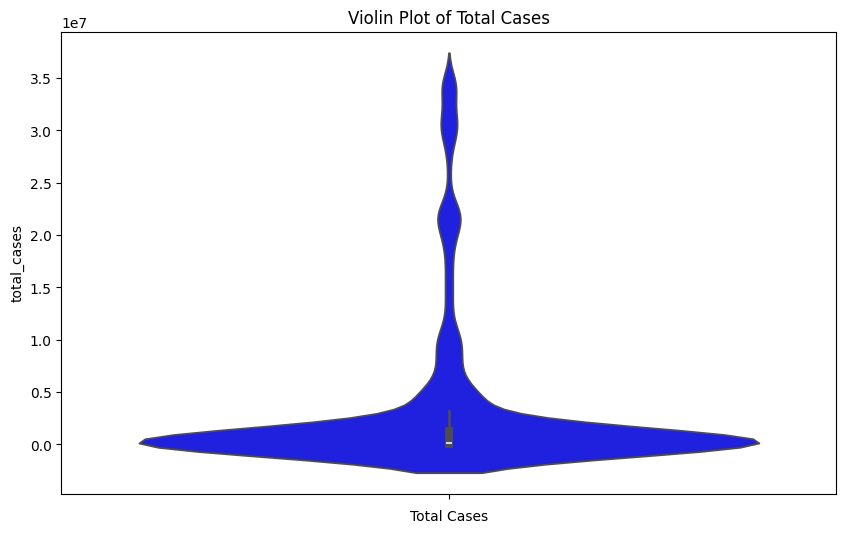

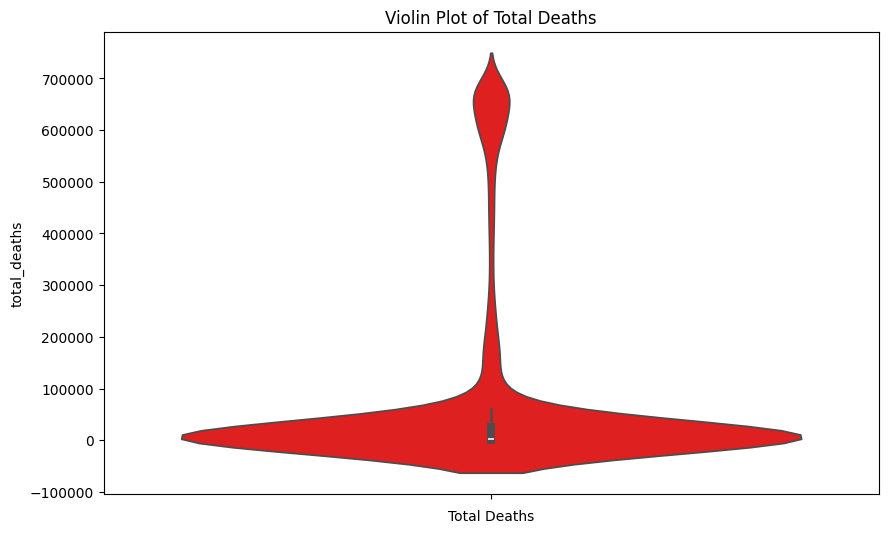

In [34]:
# Violin plot for total cases
plt.figure(figsize=(10, 6))
sns.violinplot(data['total_cases'], color='blue')
plt.title('Violin Plot of Total Cases')
plt.xlabel('Total Cases')
plt.show()

# Violin plot for total deaths
plt.figure(figsize=(10, 6))
sns.violinplot(data['total_deaths'], color='red')
plt.title('Violin Plot of Total Deaths')
plt.xlabel('Total Deaths')
plt.show()


Clustering algorithms

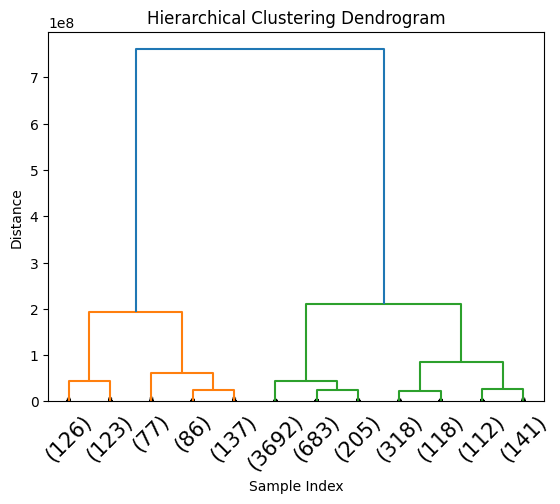

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering with Euclidean distance
Z = linkage(data[['total_cases', 'total_deaths']].dropna(), method='ward')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



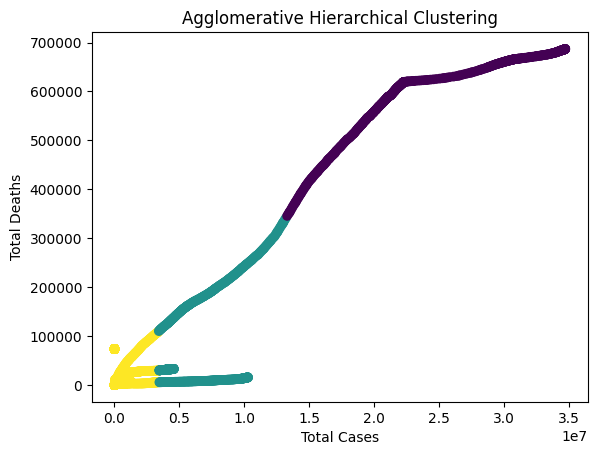

In [39]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Select only numerical features for clustering
# Assuming 'total_cases', 'total_deaths' are your desired features
numerical_data = data[['total_cases', 'total_deaths']].dropna()

# Perform Agglomerative Clustering on numerical data
agg_clust = AgglomerativeClustering(n_clusters=3)
data['agg_cluster'] = agg_clust.fit_predict(numerical_data)

# Plotting the clusters
plt.scatter(data['total_cases'], data['total_deaths'], c=data['agg_cluster'], cmap='viridis') # Changed to your desired features
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("Total Cases") # Changed to your desired feature
plt.ylabel("Total Deaths") # Changed to your desired feature
plt.show()

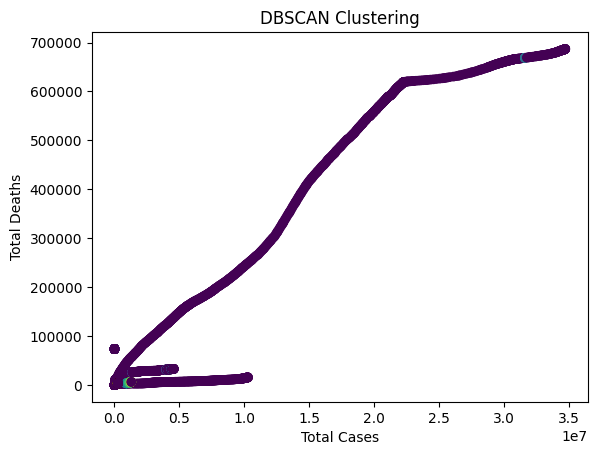

In [41]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Select only numerical features for clustering
# Assuming 'total_cases', 'total_deaths' are your desired features
numerical_data = data[['total_cases', 'total_deaths']].dropna()

# Perform DBSCAN clustering on numerical data
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(numerical_data)

# Plotting the clusters
plt.scatter(data['total_cases'], data['total_deaths'], c=data['dbscan_cluster'], cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()


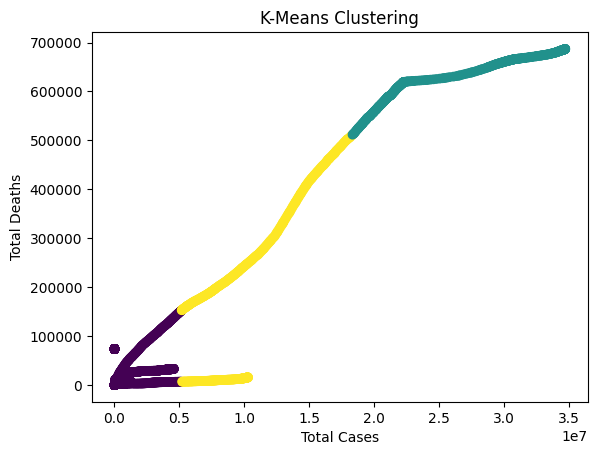

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume `data` is the dataset you want to apply clustering to
# Choose the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Select the numerical features for clustering
# Replace 'feature1', 'feature2' with the actual column names from your data
numerical_features = ['total_cases', 'total_deaths']
data['kmeans_cluster'] = kmeans.fit_predict(data[numerical_features].dropna())

# Plotting the clusters
plt.scatter(data['total_cases'], data['total_deaths'], c=data['kmeans_cluster'], cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


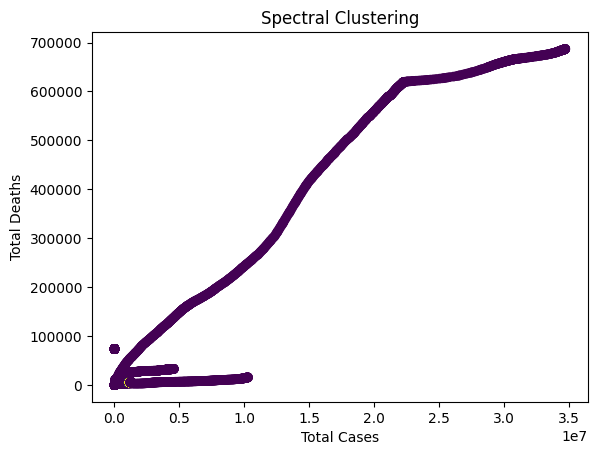

In [43]:
from sklearn.cluster import SpectralClustering
import pandas as pd

# Assuming 'total_cases', 'total_deaths' are your desired features
# Select only numerical features for clustering
numerical_data = data[['total_cases', 'total_deaths']].dropna()

# Perform Spectral Clustering
spectral_clust = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['spectral_cluster'] = spectral_clust.fit_predict(numerical_data) # Changed to numerical_data

# Plotting the clusters
plt.scatter(data['total_cases'], data['total_deaths'], c=data['spectral_cluster'], cmap='viridis')
plt.title("Spectral Clustering")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

Dimensionality reduction

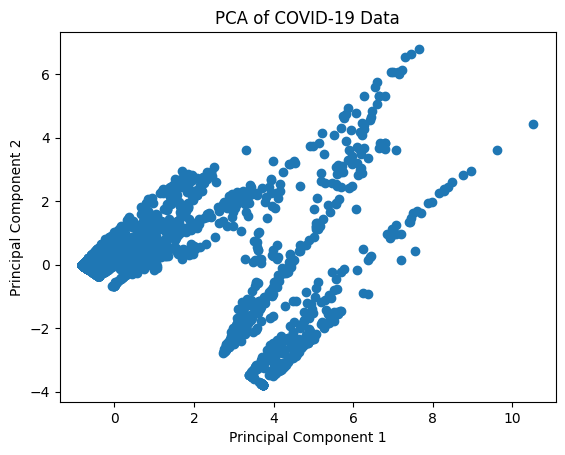

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].dropna())

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Plot PCA results
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of COVID-19 Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


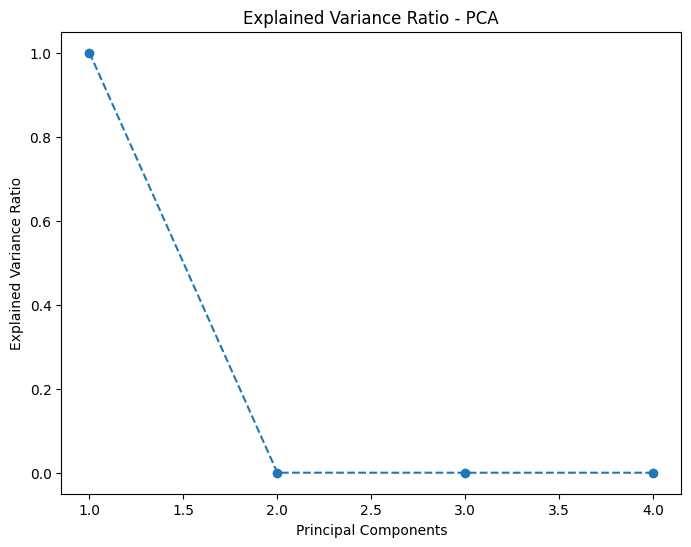

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Select only numerical features for PCA
# Assuming 'total_cases', 'total_deaths', 'new_cases', 'new_deaths' are numerical
numerical_features = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
numerical_data = data[numerical_features].dropna() # Select numerical features and drop rows with missing values

# Fit PCA to the numerical data
pca = PCA()
pca.fit(numerical_data)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, numerical_data.shape[1] + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Explained Variance Ratio - PCA")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

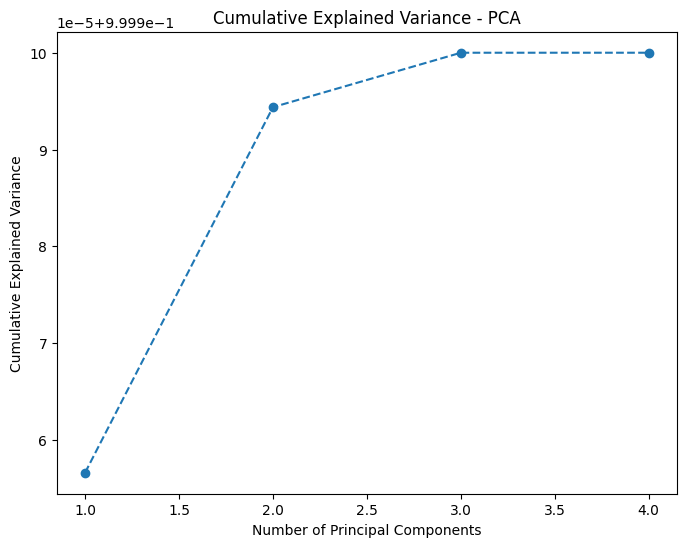

In [53]:
# Cumulative explained variance plot
import numpy as np  # Import numpy
plt.figure(figsize=(8, 6))
# Change data.shape[1] to numerical_data.shape[1] or len(pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance - PCA")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


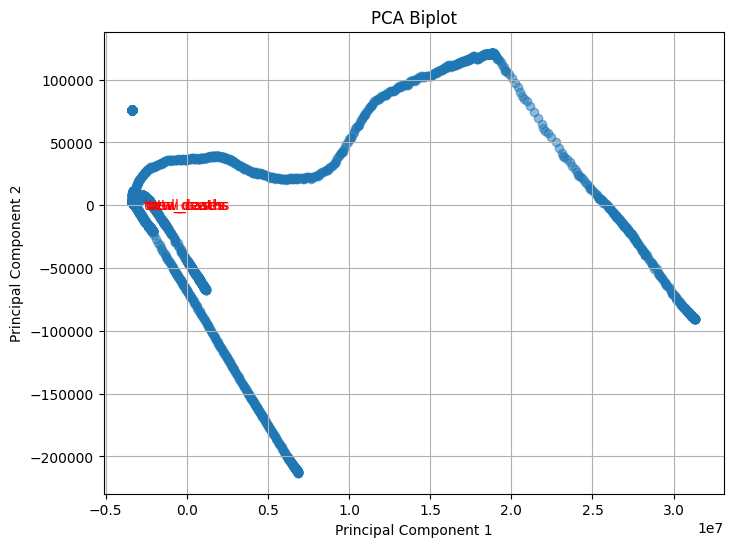

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numerical features for PCA
numerical_features = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
# Filter the DataFrame to include only numerical features
numerical_data = data[numerical_features].dropna() # Select numerical features and drop rows with missing values

# Now apply PCA to this numerical data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numerical_data)

# Get the loadings (eigenvectors) for the first two components
loadings = pca.components_.T

# Create the biplot
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, label='Data Points')

# Add arrows representing feature loadings (adjust this part based on your actual feature names)
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, width=0.005)
    # Use numerical_features for labels instead of data.columns
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, numerical_features[i], color='r', ha='center', va='center')

plt.title("PCA Biplot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


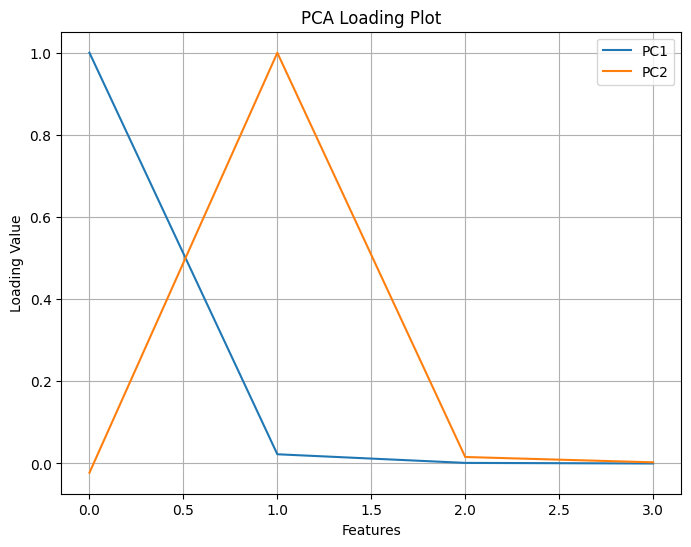

In [56]:
# Loading plot
plt.figure(figsize=(8, 6))
for i in range(pca.components_.shape[0]):
    plt.plot(pca.components_[i], label=f'PC{i+1}')

plt.title("PCA Loading Plot")
plt.xlabel("Features")
plt.ylabel("Loading Value")
plt.legend()
plt.grid(True)
plt.show()


MODEL Development and Evaluation

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define target and features
X = data[['total_cases', 'total_deaths']].fillna(0)
y = data['new_cases'].fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 340477807.04360676
Mean Absolute Error: 9944.978909732037
Root Mean Squared Error: 18452.04072842911
R^2 Score: 0.2765820128022006


In [64]:
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adjusted_r2}")



Adjusted R²: 0.27533581471917257


In [65]:
residuals = y_test - y_pred


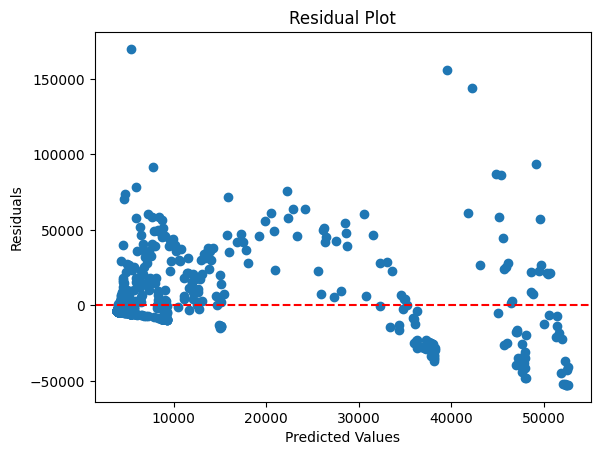

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


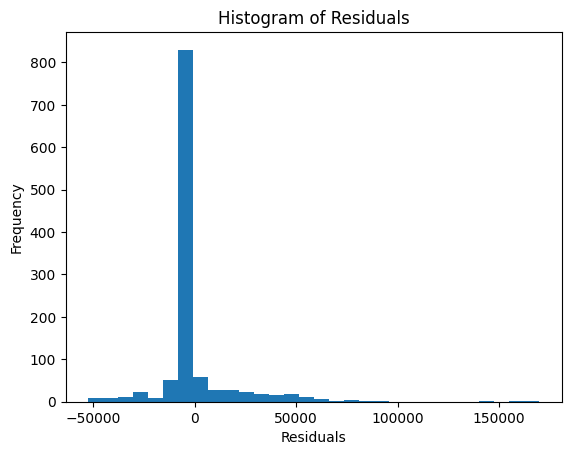

In [67]:
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [68]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Scores (MSE): {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores (MSE): [-2.74454863e+07 -5.10494917e+08 -6.85783896e+08 -1.79343492e+09
 -3.22162908e+07]
Average Cross-Validation Score: -609875101.486797


In [69]:
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")
print(f"Training R² Score: {train_r2}")


Training MSE: 325338576.8337426
Training R² Score: 0.2712280393929104


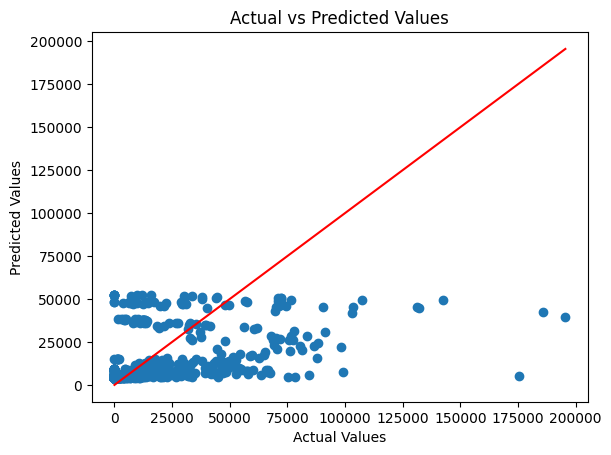

In [71]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


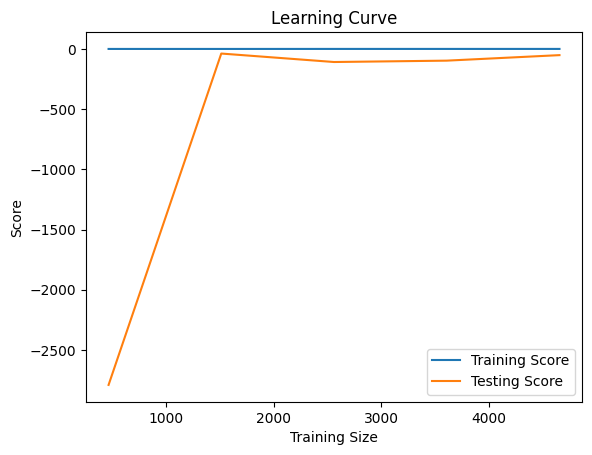

In [72]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [73]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R² Score: {rf_r2}")


Random Forest MSE: 85329937.81023955
Random Forest R² Score: 0.8186982805299527


In [3]:
!git config --global user.name "oliva2"
!git config --global user.email "oliva.j2021@vitstudent.ac.in"



In [4]:
!git clone https://github.com/oliva2/EDA.git

Cloning into 'EDA'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [5]:
!mv example_script.py EDA/

mv: cannot stat 'example_script.py': No such file or directory


In [6]:
# Check the current directory
!pwd
# List all files in the current directory to confirm if example_script.py exists
!ls


/content
EDA  sample_data


In [7]:
%cd /content/EDA


/content/EDA


In [8]:
# Check if example_script.py exists in the EDA directory
!ls


example_script.py  README.md


In [9]:
# Search the entire content directory for example_script.py
!find /content -name "example_script.py"


/content/EDA/example_script.py


In [10]:
%cd /content/drive/MyDrive/path_to_your_script



/content/EDA
